## Boston House Price Prediction

In this project, we are going to use Linear Regression algorithm to predict the house prices in Boston, Massachussets, USA. The data was drawn from the Boston Standard Metropolitan Statistical Area in 1970.

## 1. Overview

Below is the overview of our project, what we will be working step by step.

<ul><li>Importing modules</li></ul>

<ul><li>Exploring Dataset</li>
    <ol><li>Importing the dataset from pandas library</li>
        <li>Finding which features are useful for prediction</li></ol>
</ul>
<ul><li>Univariate and Multivariate Analysis</li></ul>
<ul><li>Feature Scaling</li></ul>
<ul><li>Splitting Dataset into training and test sets</li></ul>
<ul><li>Multiple Linear Regression</li>
    <ol><li>Model Preparation</li>
        <li>Model Evaluation</li>
         <li>Model Interpretation</li>
    </ol>

</ul>


## 2. Importing modules

In [ ]:
#libraries imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets

## 3. Exploring Dataset

### 3.1 Loading the dataset

In [5]:
house_price = sklearn.datasets.load_boston()

In [6]:
#Converting sklearn dataset into a pandas dataframe
house_price_df = pd.DataFrame(house_price.data, columns=house_price.feature_names)

In [8]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
#Adding the "target" column, which in this case is price to our dataframe
house_price_df['MEDV'] = house_price.target

Boston House Price dataset has got 14 features and below their respective descriptions are presented.

<li>CRIM - per capita crime rate by town</li> 
<li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS - proportion of non-retail business acres per town.</li>
<li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
<li>NOX - nitric oxides concentration (parts per 10 million)</li>
<li>RM - average number of rooms per dwelling</li>
<li>AGE - proportion of owner-occupied units built prior to 1940</li>
<li>DIS - weighted distances to five Boston employment centres</li>
<li>RAD - index of accessibility to radial highways</li>
<li>TAX - full-value property-tax rate per $10,000</li>
<li>PTRATIO - pupil-teacher ratio by town </li>
<li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT - % lower status of the population </li>
<li>MEDV - Median value of owner-occupied homes in 1000USD</li>

MEDV is the target variable (what we want to predict.)

In [12]:
#shape of our dataset
house_price_df.shape

(506, 14)

In [13]:
#dataset info
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can see that all the features contain numerical data, not categorical, so we will have it easier at this aspect to work with data.

In [14]:
#checking for missing values
house_price_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

This dataset brings us also another advantage, which is the lack of missing or so called 'null' vallues. 

## 3.2 Finding variables useful for prediction

<AxesSubplot:>

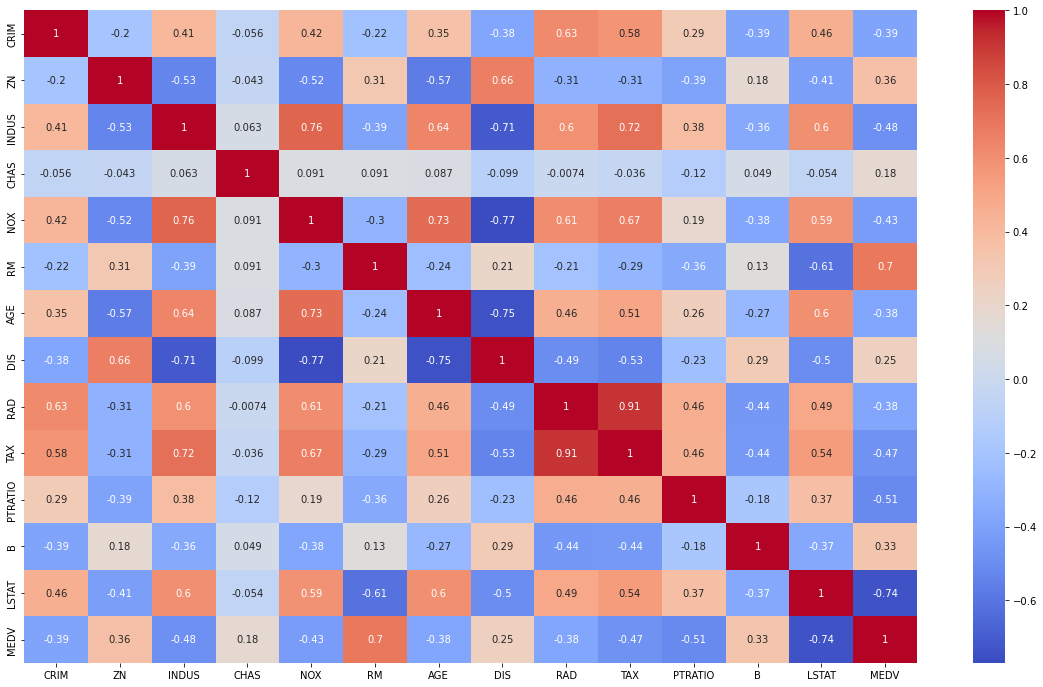

In [16]:
plt.figure(figsize = (20,12))
corr = house_price_df.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

INDUS, RM, TAX, PTRATIO and LSTAT features show a good correlation with MEDV. Among those features, we can clearly see there are other features (independent with each other) showing high values of correlation and this is leads to multicollinearity, which is not a good indicator when predicting the value of the target feature. INDUS shows high correlation with several features, thus for now we are interested in analyzing only the values of the 4 features mentioned above plus the target variable.

In [21]:
df = house_price_df[['RM','TAX','PTRATIO','LSTAT','MEDV']]

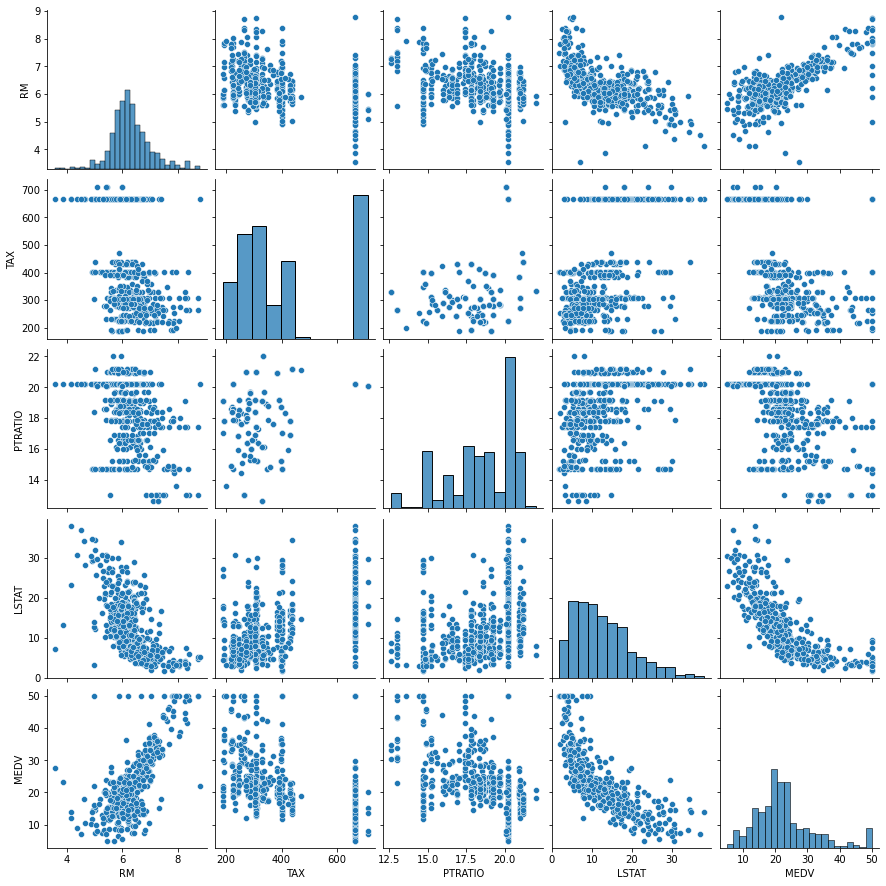

In [22]:
sns.pairplot(data = df)

<b>Observations</b><br>
We can see that LSTAT and RM show good linear relationship with MEDV and also these 3 features are quite normally distributed. However in general we can see outliers, which must be removed, for a better accuracy of the model.

In [23]:
for k, v in df.items():

    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    
    iqr = q3 - q1
    
    v_col = v[(v<= (q1 - (1.5 * iqr))) | (v >= (q3 + (1.5 * iqr)))]
    
    percentage = (v_col.shape[0] * 100) / df.shape[0]
    
    print("Outliers of ",k," are: ",round(percentage,2),"%")

Outliers of  RM  are:  5.93 %
Outliers of  TAX  are:  0.0 %
Outliers of  PTRATIO  are:  2.96 %
Outliers of  LSTAT  are:  1.38 %
Outliers of  MEDV  are:  7.91 %


However, best approach would be to take the features separately and remove outliers step by step by each feature.

## MEDV

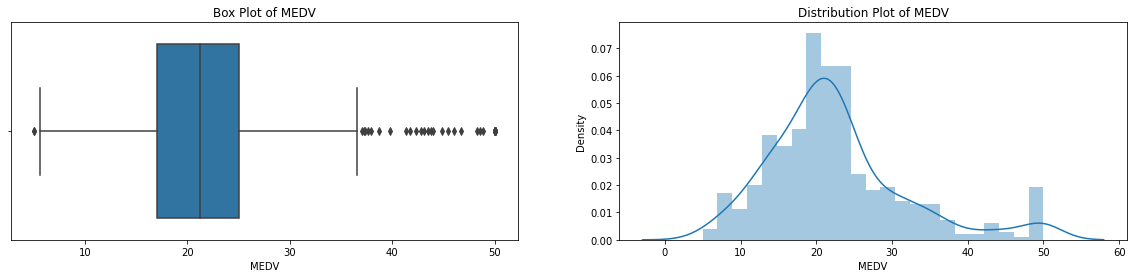

In [24]:
plt.figure(figsize=(20,4))


plt.subplot(1,2,1)
sns.boxplot(df['MEDV'])
plt.title('Box Plot of MEDV')


plt.subplot(1,2,2)
sns.distplot(df['MEDV'])
plt.title('Distribution Plot of MEDV')

plt.show()

The observation above shows us a normal distribution for MEDV, but some extreme values, which can be potential outliers. 

In [32]:
q1 = df['MEDV'].quantile(0.25)
q3 = df['MEDV'].quantile(0.75)
IQR = q3 - q1

#Formula Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

MEDV_1 = q1 - 1.5 * IQR
MEDV_3 = q3 + 1.5 * IQR

df[df['MEDV'] < MEDV_1]

,RM,TAX,PTRATIO,LSTAT,MEDV
398,5.453,666.0,20.2,30.59,5.0
405,5.683,666.0,20.2,22.98,5.0


We can see that TAX is very high for such lower house prices and LSTAT is very high as well. This makes sense, since these two features are strongly correlated with the MEDV feature, TAX being negatively correlated and LSTAT being positively correlated.

In [35]:
df[df['MEDV'] > MEDV_3].sort_values(by = ['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398.0,15.2,5.10,37.0
179,6.980,193.0,17.8,5.04,37.2
291,7.148,245.0,19.2,3.56,37.3
226,8.040,307.0,17.4,3.13,37.6
182,7.155,193.0,17.8,4.82,37.9
97,8.069,276.0,18.0,4.21,38.7
180,7.765,193.0,17.8,7.56,39.8
157,6.943,403.0,14.7,4.59,41.3
232,8.337,307.0,17.4,2.47,41.7
202,7.610,348.0,14.7,3.11,42.3


We can observe that for house price between 37 and 50, RM is higher than 75% of the points. We are going to drop the values where house price = 50, because this indicates a problem in making good predictions. 

In [36]:
print("Shape of dataset before removing outliers",df.shape)

Shape of dataset before removing outliers (506, 5)


In [37]:
df1 = df[~(df['MEDV'] == 50)]

In [38]:
print("Shape of dataset before removing outliers",df1.shape)

Shape of dataset before removing outliers (490, 5)


## TAX

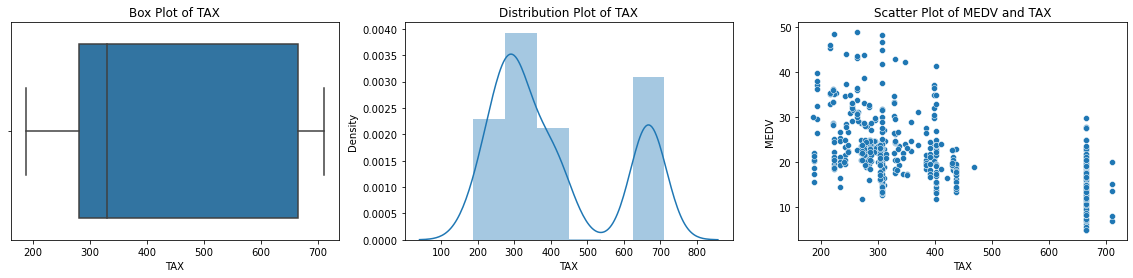

In [41]:
#Box Plot, Distribution and Scatter plot for Tax
plt.figure(figsize=(20,4))


plt.subplot(1,3,1)
sns.boxplot(df1['TAX'])
plt.title('Box Plot of TAX')


plt.subplot(1,3,2)
sns.distplot(df1['TAX'])
plt.title('Distribution Plot of TAX')

plt.subplot(1,3,3)
sns.scatterplot(df1['TAX'], df1['MEDV'])
plt.title('Scatter Plot of MEDV and TAX')

plt.show()

TAX is not normally distributed and while box plot is not showing any outliers, there are some extreme values that need to be removed.

In [44]:
temp_df = df1[df1['TAX'] > 600].sort_values(by = ['RM','MEDV'])

In [45]:
temp_df.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.000689,667.704545,20.196212,19.167045,14.994697
std,0.712621,8.623365,0.019163,6.483094,5.405825
min,3.561000,666.000000,20.100000,5.290000,5.000000
25%,5.674250,666.000000,20.200000,14.647500,10.900000
50%,6.139500,666.000000,20.200000,18.100000,14.100000
75%,6.407250,666.000000,20.200000,23.275000,19.200000
max,8.780000,711.000000,20.200000,37.970000,29.800000


We can see there are such high TAX values for all these indicators ranging from low values to higher ones, such as it seems impossible.<br>
Since LSTAT is most correlated to TAX, as we have seen in heatmap built before, we are going to replace those 132 TAX values with mean of remaining TAX values based on some intervals and ranges.<br>
<li> Interval 1 - Replacing the extreme TAX values having LSTAT between 0 and 10 </li>
<li> Interval 2 - Replacing the extreme TAX values having LSTAT between 10 and 20 </li>
<li> Interval 3 - Replacing the extreme TAX values having LSTAT between 20 and 30 </li>
<li> Interval 4 - Replacing the extreme TAX values having LSTAT between 30 and 40 </li>

In [47]:
TAX_10 = df1[(df1['TAX']<600) & (df1['LSTAT']>=0) & (df1['LSTAT']<10)]['TAX'].mean()
TAX_20 = df1[(df1['TAX']<600) & (df1['LSTAT']>=10) & (df1['LSTAT']<20)]['TAX'].mean()
TAX_30 = df1[(df1['TAX']<600) & (df1['LSTAT']>=20) & (df1['LSTAT']<30)]['TAX'].mean()
TAX_40 = df1[(df1['TAX']<600) & (df1['LSTAT']>=30)]['TAX'].mean()

indexes = list(df1.index)
for i in indexes:
    if df1['TAX'][i] > 600:
        if (0 <= df1['LSTAT'][i] < 10):
            df1.at[i,'TAX'] = TAX_10
        elif (10 <= df1['LSTAT'][i] < 20):
            df1.at[i,'TAX'] = TAX_20
        elif (20 <= df1['LSTAT'][i] < 30):
            df1.at[i,'TAX'] = TAX_30
        elif (df1['LSTAT'][i] >30):
            df1.at[i,'TAX'] = TAX_40

print('Values imputed successfully') 

Values imputed successfully


Text(0.5, 1.0, 'Distribution of TAX after replacing extreme values')

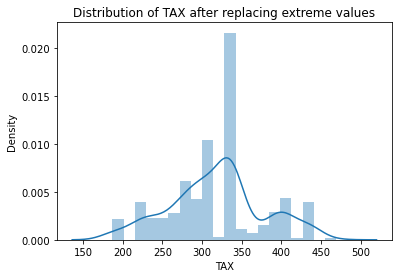

In [50]:
sns.distplot(df1['TAX'])
plt.title("Distribution of TAX after replacing extreme values")

## PTRATIO

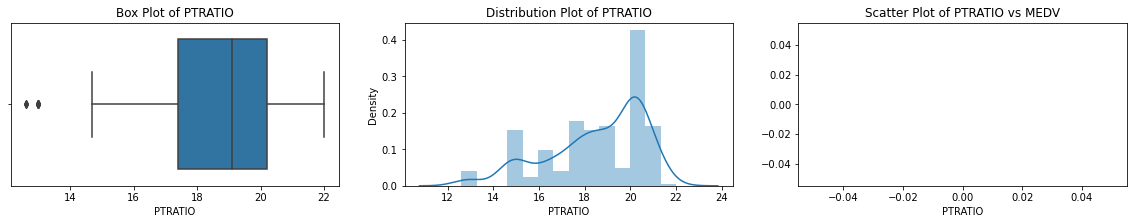

In [53]:
#Box Plot, Distribution Plot and Scatter Plot for PTRATIO
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df1['PTRATIO'])
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(df1['PTRATIO'])
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(df1['PTRATIO'])
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

PTRATIO is not normally distributed and it seems there are some outliers.

In [54]:
df1[df1['PTRATIO'] < 14].sort_values(by = ['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
265,5.560,264.0,13.0,10.45,22.8
259,6.842,264.0,13.0,6.90,30.1
266,7.014,264.0,13.0,14.79,30.7
197,7.107,329.0,12.6,8.61,30.3
260,7.203,264.0,13.0,9.59,33.8
264,7.206,264.0,13.0,8.10,36.5
198,7.274,329.0,12.6,6.62,34.6
196,7.287,329.0,12.6,4.08,33.3
263,7.327,264.0,13.0,11.25,31.0
258,7.333,264.0,13.0,7.79,36.0


We can observe, that PTRATIO values stay all the same, RM and MEDV increase their values and this is acceptable, since those 2 features are positively correlated. As LSTAT increases, MEDV decreases, which follows a negative correlation. We don't observe anything wrong with these outliers, so it is not a problem for us to keep them.

## LSTAT

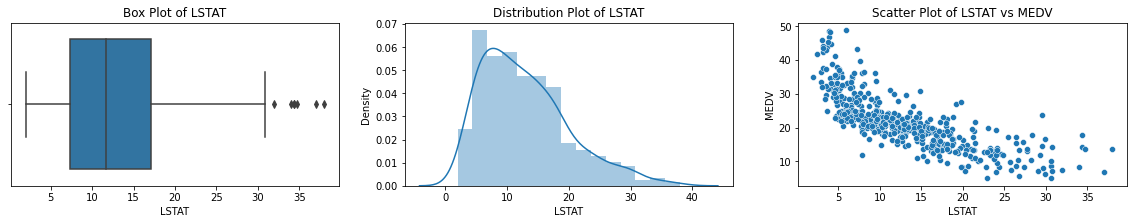

In [56]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df1['LSTAT'])
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(df1['LSTAT'])
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(df1['LSTAT'],df1['MEDV'])
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

LSTAT is normally distributed, skewed to the right. There are some high values of LSTAT, which need to be analyzed

In [61]:
q1 = df1['LSTAT'].quantile(0.25)
q3 = df1['LSTAT'].quantile(0.75)
IQR = q3 - q1

#Formula Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

LSTAT_1 = q1 - 1.5 * IQR
LSTAT_3 = q3 + 1.5 * IQR

df1[df1['LSTAT'] > LSTAT_3].sort_values(by='LSTAT')

,RM,TAX,PTRATIO,LSTAT,MEDV
387,5.000,335.0,20.2,31.99,7.4
438,5.935,335.0,20.2,34.02,8.4
412,4.628,335.0,20.2,34.37,17.9
141,5.019,437.0,21.2,34.41,14.4
373,4.906,335.0,20.2,34.77,13.8
414,4.519,335.0,20.2,36.98,7.0
374,4.138,335.0,20.2,37.97,13.8


Since LSTAT and MEDV both have a negative correlation, high increasement of values of LSTAT gives decreasement of MEDV. There is no reason to exclude those values.

## RM

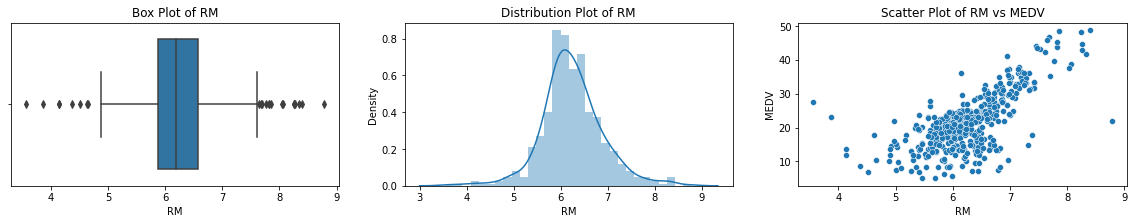

In [62]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
sns.boxplot(df1['RM'])
plt.title('Box Plot of RM')

plt.subplot(1,3,2)
sns.distplot(df1['RM'])
plt.title('Distribution Plot of RM')

plt.subplot(1,3,3)
sns.scatterplot(df1['RM'],df1['MEDV'])
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

From our observations, we can notice that RM is normally distributed and it has a positive linear relationship with MEDV. However there are some high and low RM values, which we have to analyze.

In [64]:
q1 = df1['RM'].quantile(0.25)
q3 = df1['RM'].quantile(0.75)
IQR = q3 - q1

#Formula Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

RM_1 = q1 - 1.5 * IQR
RM_3 = q3 + 1.5 * IQR

df1[df1['RM'] < RM_1].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,293.914141,20.2,7.12,27.5
367,3.863,334.330882,20.2,13.33,23.1
406,4.138,338.636364,20.2,23.34,11.9
374,4.138,335.000000,20.2,37.97,13.8
384,4.368,335.000000,20.2,30.63,8.8
414,4.519,335.000000,20.2,36.98,7.0
412,4.628,335.000000,20.2,34.37,17.9
386,4.652,338.636364,20.2,28.28,10.5


Noticing two abnormal data points, in index 365 and 367, in which the price is high for low value of RM. Other than that, we don't notice any abnormal features.

In [65]:
df2 = df1.drop(axis = 0, index=[365,367])

In [66]:
df2[df2['RM'] > RM_3].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
282,7.645,216.000000,14.9,3.01,46.0
228,7.686,307.000000,17.4,3.92,46.7
273,7.691,223.000000,18.6,6.58,35.2
180,7.765,193.000000,17.8,7.56,39.8
98,7.820,276.000000,18.0,3.57,43.8
280,7.820,216.000000,14.9,3.76,45.4
203,7.853,224.000000,14.7,3.81,48.5
226,8.040,307.000000,17.4,3.13,37.6
97,8.069,276.000000,18.0,4.21,38.7
233,8.247,307.000000,17.4,3.95,48.3


Index 364 has a very high RM, while a low MEDV compared to RM value. We will drop this row.

In [68]:
df3 = df2.drop(axis = 0, index = 364)

## Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit our data

columns = df3.columns

scaled_cols = scaler.fit_transform(df3[columns])
scaled_cols = pd.DataFrame(scaled_cols, columns=columns)
scaled_cols.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,0.520221,-0.379247,-1.520681,-1.125130,0.302117
1,0.273206,-1.301149,-0.336221,-0.537918,-0.002581
2,1.498656,-1.301149,-0.336221,-1.259229,1.660563
3,1.198709,-1.642594,0.090184,-1.413090,1.495518
4,1.437704,-1.642594,0.090184,-1.075725,1.850999


## Splitting Dataset into training and test sets

In [69]:
X = df3.drop(columns=['MEDV'], axis = 1)
y = df3['MEDV']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

## Model Preparation

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model Evaluation

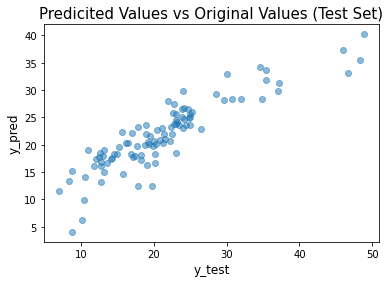

In [75]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("Cost function value is: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute error value is: ",mean_absolute_error(y_test, y_pred))
print("R^2 score is: ",r2_score(y_test,y_pred))

Cost function value is:  16.59128127426708
Mean Absolute error value is:  3.10200843654394
R^2 score is:  0.7701496039985669


## Model Interpretation

(-15.0, 5.0)

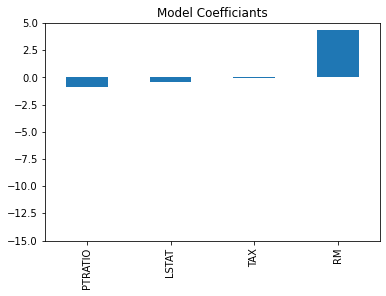

In [110]:
coefs = pd.Series(model.coef_, X.columns).sort_values()
coefs.plot(kind = "bar", title = "Model Coefficiants")
plt.ylim([-15,5])

As we know, as the number of rooms increases, the price of the house increases. Whereas if the number of lower class people is high in a region or if the student-teacher ratio is bigger  i.e. less number of teachers for more number of students or if TAX rate is more, obiously House price will go down.
Our multiple regression model does not explains the data perfectly (as R sqare value is 0.77) but it still it explains the good relationship of House Price and other factors affecting the price.